In [18]:
from pandas import read_csv , DataFrame
from matplotlib.pyplot import pie , bar , xlabel , ylabel , legend , title , show
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [19]:
file = read_csv('fetal_health.csv')
df = file.copy()
df.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1606,137.0,0.002,0.048,0.004,0.004,0.0,0.0,62.0,2.6,0.0,...,81.0,172.0,7.0,0.0,140.0,122.0,142.0,8.0,0.0,1.0
1485,132.0,0.013,0.000,0.010,0.000,0.0,0.0,30.0,1.3,0.0,...,97.0,166.0,2.0,0.0,145.0,142.0,144.0,8.0,1.0,1.0
2055,127.0,0.000,0.001,0.005,0.000,0.0,0.0,62.0,0.7,58.0,...,120.0,140.0,1.0,0.0,126.0,125.0,126.0,0.0,-1.0,1.0
1764,120.0,0.000,0.000,0.005,0.011,0.0,0.0,60.0,1.6,0.0,...,69.0,154.0,4.0,1.0,86.0,105.0,105.0,75.0,0.0,3.0
1463,148.0,0.000,0.000,0.006,0.000,0.0,0.0,51.0,0.5,59.0,...,152.0,163.0,1.0,0.0,160.0,159.0,161.0,0.0,1.0,1.0
843,138.0,0.000,0.000,0.003,0.000,0.0,0.0,44.0,0.6,61.0,...,130.0,149.0,1.0,0.0,141.0,140.0,142.0,0.0,0.0,2.0
1457,148.0,0.005,0.000,0.002,0.000,0.0,0.0,40.0,0.9,0.0,...,136.0,171.0,1.0,0.0,153.0,155.0,156.0,4.0,0.0,1.0
427,120.0,0.013,0.006,0.003,0.000,0.0,0.0,40.0,1.3,0.0,...,68.0,157.0,5.0,1.0,133.0,134.0,136.0,9.0,1.0,1.0
226,127.0,0.007,0.005,0.000,0.000,0.0,0.0,48.0,1.1,2.0,...,64.0,148.0,2.0,0.0,133.0,132.0,134.0,7.0,1.0,1.0
1227,125.0,0.000,0.000,0.005,0.000,0.0,0.0,45.0,0.7,33.0,...,122.0,141.0,0.0,0.0,131.0,130.0,131.0,1.0,0.0,1.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [21]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


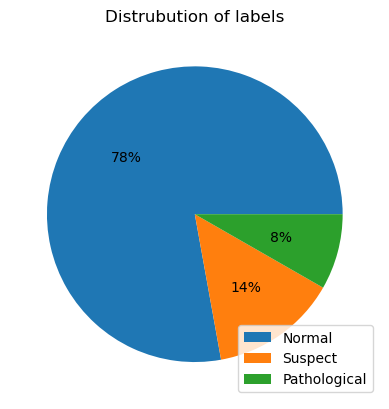

In [22]:
pie(df.fetal_health.value_counts().values,autopct='%1.f%%')
legend(['Normal','Suspect','Pathological'])
title('Distrubution of labels')
show()

In [23]:
label = df.fetal_health

df = df.drop(['fetal_health'],axis=1)

In [24]:
scaled_df = scaler.fit_transform(df)

In [25]:
xtr , xts , ytr , yts = train_test_split(scaled_df,label.to_numpy(),test_size=0.2,random_state=32)

In [26]:
print('Train set sise:',len(xtr))
print('Test set size:',len(xts))

Train set sise: 1700
Test set size: 426


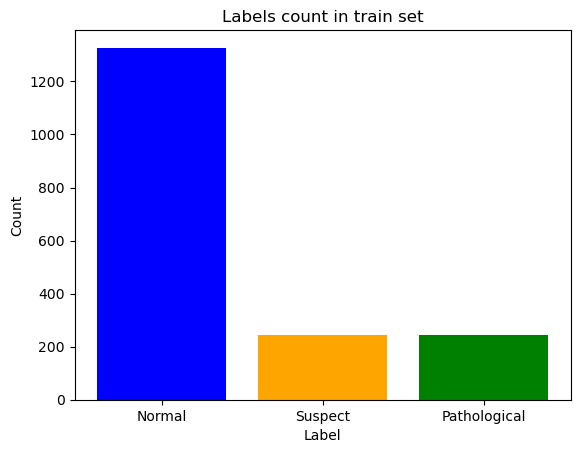

In [27]:
bar(['Normal','Suspect','Pathological'],[ytr.tolist().count(1),
                                         ytr.tolist().count(2),
                                         ytr.tolist().count(2)],color=['blue','orange','green'])
xlabel('Label')
ylabel('Count')
title('Labels count in train set')
show()

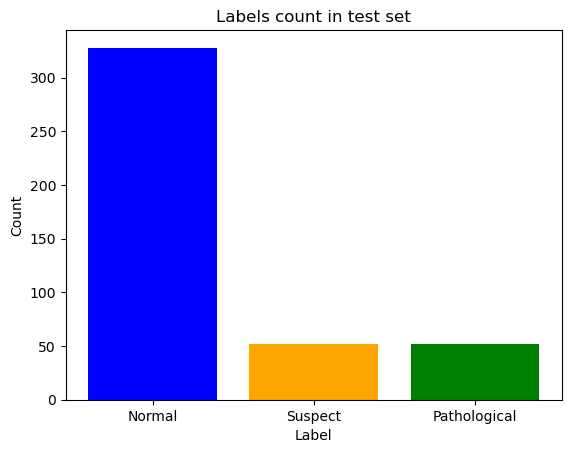

In [28]:
bar(['Normal','Suspect','Pathological'],[yts.tolist().count(1),
                                         yts.tolist().count(2),
                                         yts.tolist().count(2)],color=['blue','orange','green'])
xlabel('Label')
ylabel('Count')
title('Labels count in test set')
show()

In [29]:
results = list()
for alg in [DecisionTreeClassifier,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
            LGBMClassifier,
            KNeighborsClassifier,
            LogisticRegression,
            CatBoostClassifier]:
    carrier = list()
    model = alg()
    model.fit(xtr,ytr)
    carrier.extend([str(alg).split('.')[-1][:-2],model.score(xtr,ytr)*100,model.score(xts,yts)*100])
    model.fit(scaled_df,label.to_numpy())
    carrier.append(model.score(scaled_df,label.to_numpy())*100)
    results.append(carrier)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1229
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.247707
[LightGBM] [Info] Start training from score -1.945322
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 2126, number of used features: 20
[LightGBM] [Info] Start training from score -0.250441
[LightGBM] [Info] Start training from score -1.975022
[Lig

In [30]:
results = DataFrame(results,columns=['Model','Accuracy on train set','Accuracy on test set','Accuracy on full data'])
results

,Model,Accuracy on train set,Accuracy on test set,Accuracy on full data
0,DecisionTreeClassifier,99.882353,92.018779,99.905927
1,RandomForestClassifier,99.882353,92.018779,99.905927
2,GradientBoostingClassifier,99.352941,93.896714,99.059266
3,ExtraTreesClassifier,99.882353,92.488263,99.905927
4,LGBMClassifier,99.882353,94.366197,99.905927
5,KNeighborsClassifier,93.705882,89.906103,93.744120
6,LogisticRegression,90.470588,90.140845,90.451552
7,CatBoostClassifier,99.882353,93.661972,99.905927


# End